Check out the lectures, using:


**<font color=darkred>git clone git@github.com:harris-ippp/lectures</font>**

If you've already checked it out, you can do: `git pull`.

# Functions, Classes, and Modules
* We've already said that this class will combine low-level building blocks (for, while, if), with higher-level 'recipes.'
* Today we take our first step in that direction: building reusable `functions` ourselves, and importing and using code that others have written.
* Along the way, we'll learn about a new, important structure: classes.

## Functions
* Functions allow us to write a single piece of code once, to reuse it with different arguments.
* We are said to _call_ the function.
* Functions may or may not return a value
* We've already seen many built-in functions:

In [66]:
print("print is, of course, a function")

print is, of course, a function


In [67]:
type(32), type(3.2), int(3.5), "a b c".split()

(int, float, 3, ['a', 'b', 'c'])

Actually, even operators are disguised functions: `+` is `__add__()`, `-` is `__sub__()`, etc.

In [68]:
a, b = 3, 5
a + b, a.__add__(b), a - b, a.__sub__(b)

(8, 8, -2, -2)

You can see that these functions are not all the same:
* `print()` and `type()` take arguments, but they are not called _on_ an object: there is no "`.`".
* In contrast, `"a b c".split()` and `a.__add__(b)` are called _on_ the `string` `"a b c"` or the `int` variable `a`.  These are called _member functions_.  It is acting upon the object, possibly changing it:

In [69]:
l = [2, 3, 1, 2] # define an unordered list
print(l.sort()) # the member function _changes_ the object.
print(l)

None
[1, 2, 2, 3]


**Open ex/ex1.py with atom.  Edit to:**
* **<font color=darkred>Print, "`sorted()`" in alphabetical order, the fruit listed in ex1.py.</font>**
* **<font color=darkred>for loop/if review: print only the berries.</font>**

* Note that `type()` and `"a b c".split()` return values, while `print()` and `l.sort()` do not.

### User functions: `def`
* To write our own functions, use the `def` keyword, and consistently indent the entire block.
* After `def`, we define the function's name.
* After it follows, within parentheses, any number of variables.

In [1]:
def hi():
    
    print("hello")
    
hi()


def squared(v):
    
    print("{} squared is {}".format(v, v * v))
    
squared(3)
squared(9)
squared(4)
squared(-9.23)

hello
3 squared is 9
9 squared is 81
4 squared is 16
-9.23 squared is 85.19290000000001


"Scope" may not be what you expect.
* If you pass in a variable, you are actually passing in a _pointer_ to the variable!  If you reassign it, it will not remain changed, when the function is over.

In [17]:
def fn1(l):
   
    l = "def"
    print(l)

l = ["a", "b", "c"]
fn1(l)
print(l)

def
['a', 'b', 'c']


* However, if you _manipulate it_, those changes _will_ persist!

In [18]:
def fn2(l):
   
    l.extend(["d", "e", "f"])
    print(l)
    
l = ["a", "b", "c"]
fn2(l)
print(l)

['a', 'b', 'c', 'd', 'e', 'f']
['a', 'b', 'c', 'd', 'e', 'f']


* Variables defined outside the function will be available to it...

In [ ]:
def fn3():
    
    print(l)

l = [1, 2, 3]
fn3()

* But variables defined inside the function won't be available on the outside.

In [19]:
def fn4():
    
    f4 = [4, 5, 6]
    print(f4)

fn4()
print(f4)

[4, 5, 6]


NameError: name 'f4' is not defined

You can have some optional parameters, by specifying a default value

In [72]:
def power(v, exp = 2):
    
    print("{0}^{1} is {2}".format(v, exp, v ** exp))
    
power(3)
power(3, 3)
power(exp = 4, v = 3)
# power(exp = 2) # this won't work: v is required.

3^2 is 9
3^3 is 27
3^4 is 81


All required arguments must precede the optional ones:

In [73]:
# This won't work, because v = 3 is trying to be optional.
# def power(v = 3, exp):
def power(v, exp = 3):
    
    print("{}^{} is {}".format(v, exp, v ** exp))
    

### Returning values: `return`
* Functions can also `return` one or many values.
* Some people consider it good form to return a dictionary for many values.

In [74]:
def volume(l, w, h):
    
    return l * w * h

def surface(l, w, h):
    
    return 2 * (l * w + l * h + w * h)

def dimensions(l, w, h):
    
    return {"surface" : surface(l, w, h),
            "volume"  : volume(l, w, h)}

def dimensions_2(l, w, h):

    return surface(l, w, h), volume(l, w, h)

print(volume(2, 3, 4))
print(surface(2, 3, 4))
print(dimensions(2, 3, 4))
r = dimensions(2, 3, 4)
print("surface:", r["surface"])

print(dimensions_2(2, 3, 4))

24
52
{'volume': 24, 'surface': 52}
surface: 52
(52, 24)


In [75]:
s = surface(2, 3, 4)
print("paint for 3 boxes:", s*3)

paint for 3 boxes: 156


* Obviously, most functions do more than these.

## Lambda Functions
* For very simple operations, there are also `lambda` functions:

In [76]:
s = lambda l, w, h: 2 * (l * w + l * h + w * h)

s(2, 3, 4)

52

**Open up ex/ex2.py and ex/ex3.py with Atom.  Make the changes, then run them: python ex/ex2.py, etc.**
* **<font color=darkred>Create a function to convert between unit lengths.</font>**
  * Use the template convert(3, "ft", "km").
  * Handle lightyears ("ly") kilometers ("km"), miles ("mi"), feet ("ft"), meters ("m"), cm ("cm"), and inches ("in").</font>
  * You may find the following helpful:
`mconv = {"ly" : 9.4605e15, "km" : 1000, "m" : 1, "cm" : 0.01, "mi" : 1609.344, "ft" : 0.3048}`
* **<font color=darkred>Create a function that returns if _n_ is prime.</font>**
  * When you're done, think about the skeleton I provided is a BAD way to build up a list of primes.  How could you do this better?

## Classes and Objects
* Classes are an important element of **object oriented programming**.
* They allow us to define a single object in code, to represent some more complex object.
* It is consists of primitive data objects (int, float, etc.) and/or complex data types, and may have additional functions/methods defined.
* The [official tutorial on classes](https://docs.python.org/3/tutorial/classes.html) is useful, though it's a bit technical.



* For the most part, we will not, in this class, _write_ classes.  However, we will use them an awful lot, and you do need to understand how they work.  
* In particular, we'll often call methods of some class.  You have already seen this for `strings` and `lists` -- which are simple classes.  For example, we have called "method" functions of strings.
* Strings contain a bit of information (some text) and define a bunch of functions that you can perform on that text.

In [41]:
print("ABCDEF".__repr__())
print("ABCDEF".replace("CDEF", "BA"))
print("|+|".join([str(v) for v in range(10)]))

'ABCDEF'
ABBA
0|+|1|+|2|+|3|+|4|+|5|+|6|+|7|+|8|+|9


* Of course, these objects can get far more complicated than strings -- it can be an entire dataset:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Here, pd is a module and df is an object
df = pd.read_csv("ex/state_outcomes.csv")

We've now defined this object, that contains some basic income info for each state.

In [101]:
type(df)

pandas.core.frame.DataFrame

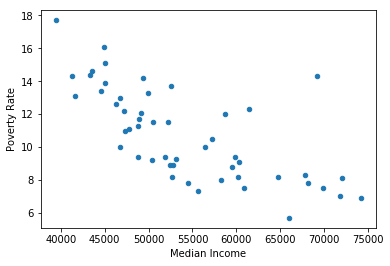

In [102]:
df.plot(kind = "scatter", x = "Median Income", y = "Poverty Rate")

Pandas will come in week 4.

Let's define a simple _person_ class, to understand how this works.
* The person should have a height, an age, and the ability to `grow()` or `age()`.
* If we want to set up certain variables when we create the object, we use the `__init__()` function.
* All member variables are written `self.var`.
* Note that each method's first argument is `self` which is to say, _this object_.  The self argument is included automatically when the function is called.

In [103]:
class person:
    
    # this is the method used to
    # initialize/declare the object.
    def __init__(self, age, height):
    
        self.age    = age    # years
        self.height = height # inches
    
    def grow(self, increment):
        
        self.height += increment
    
    def speak(self):
        
        sentence = "I am {:.0f} ft, {:.1f} inches tall."
        print(sentence.format(self.height//12, self.height % 12))
        

In [104]:
me = person(22, 68)
me.speak()
me.grow(0.2)
me.speak()
me.speak()
me.speak()
me.grow(0.8)
me.speak()

I am 5 ft, 8.0 inches tall.
I am 5 ft, 8.2 inches tall.
I am 5 ft, 8.2 inches tall.
I am 5 ft, 8.2 inches tall.
I am 5 ft, 9.0 inches tall.


* In addition to `__init__()`, one can define the representation by `__repr__()` and the print format via `__str__()`.  
* If it makes sense to do so, the arithmetic operators can also be defined.
* And of course, any other function of your imagining.

In [112]:
import random

class person:
    
    # this is the method used to
    # initialize/declare the object.
    def __init__(self, age, height, sex):
    
        self.age    = age    # years
        self.height = height # inches
        self.sex    = sex    # "M"/"F"
        
    def __str__(self):
        
        return "(person: {} yo, {:.0f} ft, {:.1f} inches)"\
                .format(self.age, self.height//12, self.height % 12)
        
    def __repr__(self):
        
        return "<person object, {:d} inches tall>".format(self.height)
        
    def __add__(self, other):
        
        if self.sex == other.sex:
            raise Exception("Can't reproduce!", self.sex, other.sex)
        
        return person(0, 20, random.choice("MF"))
    
    def grow(self, increment):
        
        self.height += increment 
        sentence = "My goodness, you're {:.0f} ft, {:.1f} inches tall."
        print(sentence.format(self.height//12, self.height % 12))
        
    def birthday(self):
        
        self.age += 1
        print("Happy Birthday -- you're {}!".format(self.age))
                

In [113]:
a = person(25, 68, "M")
b = person(25, 66, "F")
child = a + b
child.birthday()
child.birthday()
child.birthday()
print(child)
child

Happy Birthday -- you're 1!
Happy Birthday -- you're 2!
Happy Birthday -- you're 3!
(person: 3 yo, 1 ft, 8.0 inches)


<person object, 20 inches tall>

You will likely _use_ more classes than you will _make_, but it's useful to understand how they're built.
* <font color=darkred>**Use the typical heights per age below, and a for loop, to "grow a child" from birth to 20 years old.**
* <font color=darkred>**Challenge: use this list to set the "appropriate" height, given the child's age.  Remove "grow" and have the "birthday" function set the height as well as age.**

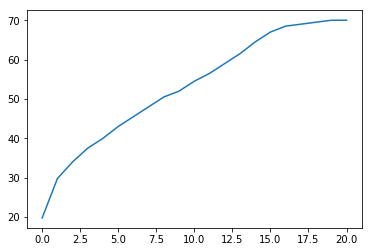

In [19]:
heights = [19.75, 29.75, 34, 37.5, 40, 43, 45.5, 48, 50.5, 52, 54.5, 56.5, 59, 61.5, 64.5, 67, 68.5, 69, 69.5, 70, 70]
plt.plot(heights)

In [15]:
?plt.plot

In [119]:
child = person(0, heights[0], "M")
for ai in range(1, 21):
    incr = heights[ai] - heights[ai-1]
    child.birthday()
    child.grow(incr)

Happy Birthday -- you're 1!
My goodness, you're 2 ft, 5.8 inches tall.
Happy Birthday -- you're 2!
My goodness, you're 2 ft, 10.0 inches tall.
Happy Birthday -- you're 3!
My goodness, you're 3 ft, 1.5 inches tall.
Happy Birthday -- you're 4!
My goodness, you're 3 ft, 4.0 inches tall.
Happy Birthday -- you're 5!
My goodness, you're 3 ft, 7.0 inches tall.
Happy Birthday -- you're 6!
My goodness, you're 3 ft, 9.5 inches tall.
Happy Birthday -- you're 7!
My goodness, you're 4 ft, 0.0 inches tall.
Happy Birthday -- you're 8!
My goodness, you're 4 ft, 2.5 inches tall.
Happy Birthday -- you're 9!
My goodness, you're 4 ft, 4.0 inches tall.
Happy Birthday -- you're 10!
My goodness, you're 4 ft, 6.5 inches tall.
Happy Birthday -- you're 11!
My goodness, you're 4 ft, 8.5 inches tall.
Happy Birthday -- you're 12!
My goodness, you're 4 ft, 11.0 inches tall.
Happy Birthday -- you're 13!
My goodness, you're 5 ft, 1.5 inches tall.
Happy Birthday -- you're 14!
My goodness, you're 5 ft, 4.5 inches tall.

## Modules
* At the simplest level, a module is just any file of python code.
* These modules save you work, and add to the potential of the language.
  * They provide us with useful functions and classes.
  * Who wants to write a sorting algorithm?  How about square root?
* Typically, many modules are grouped in a `package`.
* These packages will be the basis for almost all of our recipes.

### `import`
* Let's start by _importing_ the `math` library: trigonometry, exponents, etc.
* This basically 'loads' a bunch of constants and functions, expanding the potential of the 'calculator.'
* See the full math library [here](https://docs.python.org/3.5/library/math.html).

### Math

In [87]:
import math

We can get the constants:

In [88]:
math.pi, math.e

(3.141592653589793, 2.718281828459045)

And the functions, like so:

In [89]:
math.sqrt(9), math.pow(2, 0), math.cos(math.pi/4) ** 2, math.factorial(10), 

(3.0, 1.0, 0.5000000000000001, 3628800)

**Modify ex/ex5.py...**
* <font color=darkred>**What are _e⁻¹_, _e⁰_, _e¹_ and _e²_?**</font>
  * Use math.exp(x).
* <font color=darkred>**Some problems are not exactly computable.  If we had to consider everyone possible ordering of 1000 items, how many combinations would this be?**</font>
  * Use math.factorial.
  * You probably can't even count the digits.  Use math.log10, or len(str()) to count them.  (Why are these equivalent?)
  * For comparison, there are _10⁸⁰_ atoms in the universe.

* You can also give the module an alias, like so:

In [90]:
import math as m # alias
m.pi, m.e

(3.141592653589793, 2.718281828459045)

Alternately we can import specific functions only:

In [91]:
from math import sqrt, exp

sqrt(9), exp(1) # don't need "math."

(3.0, 2.718281828459045)

### datetime
Another useful module is `datetime`: [manual](https://docs.python.org/3.5/library/datetime.html).

In [92]:
import datetime

bd = datetime.date(1987, 6, 5)
t  = datetime.date.today()

print(t - bd)
print((t - bd).days/365.2442)
print(int((t - bd).days/365.2442))

10715 days, 0:00:00
29.336537034674336
29


Any new module, etc. that we import, can subsequently included and used as part of a class:

In [93]:
import datetime # import the library we want

class person:
    
    # this is the method used to
    # initialize/declare the object.
    def __init__(self, birthday):
    
        # Ensure that the birthday argument
        # is actually in the right format.
        # We'll talk about this next week
        if isinstance(birthday, datetime.date):
            self.birthday = birthday
        else:
            raise TypeError("Birthday must be a datettime.date.")
        
    def age(self):
        
        # use the built-in functionality of the imported class
        # to extend our own -- no need to do it from scratch.
        return int((t - self.birthday).days/365.2442)

# a = person(12) # wrong
p = person(datetime.date(2000, 1, 1))
p.age()

16

* So, we can _import_ a module, or individual functions or constants _from_ a module.
* Other libraries contain entirely new classes.
* All of the functions, constants, and classes can be used and included in our own, user-made functions and classes.
* The point is, there's tremendous functionality and shortcuts, that **you don't have to write.**  We'll more classes as we continue -- most of our recipes are based on these.
* For entirely illustrative purposes, let's consider the `turtle` module.

## Turtles
* Turtles?  Why turtles?
* Turtles are an illustrative, fun, simple module for drawing lines.  Hopefully, they will intuitively illustrate loops and modules.  That's all!

In [5]:
import math
import turtle 

Fire up a turtle:

In [6]:
t = turtle.Turtle()

To first order, turtles can 
* move `forward()` and `backward()` (aka `fd()` and `bk()`).
* they can turn `left()` or `right()` (aka `lt()` and `rt()`).
* travel directly to position: `setpos(x, y)`.
* report their `pos()`, `heading()` (angle).
* you can change their `color()`.
* call `begin_fill()` and `end_fill()` to color in the area by the turtle's movements, between the two calls

By default, they leave a trace behind them, but you can set `penup()` or `pendown()`.

The documentation is [here](https://docs.python.org/3.5/library/turtle.html).

In [7]:
t.color(0.6, 0.6, 0.6)
t.fd(100)

In [8]:
t.begin_fill()
t.rt(20)
t.fd(50)

In [9]:
t.rt(20)
t.fd(50)

In [10]:
t.rt(20)
t.fd(50)
t.end_fill()

In [7]:
t.setpos(0,0)

Use the template below to begin a function.  It will grow in complexity, step by step:
1. <font color=darkred>**Use fd() and rt() to draw a square, with sides 100 units long.**</font>
2. <font color=darkred>**Allow the size to be passed as an additional, _optional_ parameter.**</font>
3. <font color=darkred>**Rename the function polygon(), and take the number of sides as an additional parameter.  Calculate the angles in the corners on the fly.**</font>
4. <font color=darkred>**Take one more parameter -- a shade of grey.  You can specify this as three numbers (R, G, B) between 0 and 1.  Passing t.color(x, x, x) will give you a grey.**</font>
5. <font color=darkred>**Use your shaded polygon function and some for loops to make some turtle art -- something like below.  But let your artsy go -- make something satisfying.**</font>

Hints: if you're finding it slow to run the programs, you can set `turtle.tracer(0, 0)` to just print the total thing

In [8]:
#!/usr/bin/env python 

import math
import turtle 

joe = turtle.Turtle()

def square(joe):

    # Use a for loop with fd() and lt() or rt(),
    # to draw a square.
    
    pass

square(joe)

input("Hit return to end!")
turtle.bye()

Hit return to end!


A polygon-based answer could look like this:
<img src="polygon.png",width=200,height=60>

If you're feeling super ambitious, you can just attack this pseudo-triangle based creation!
<img src="triangle.png",width=200,height=60>